In [ ]:
from main import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Input equation type (example: explicit)

In [ ]:
equation_type = str(input())

implicit


Input N > 0


In [ ]:
N = int(input())

70


Input K > 0 

In [ ]:
K = int(input())

764


Input T > 0 

In [ ]:
T = int(input())

18



\begin{align}
    \frac {\partial^2{u}} {\partial{t^2}} + 2 \frac {\partial{u}} {\partial{t}}= \frac {\partial ^ 2 {u}} {\partial{x^2}} + 2 \frac {\partial{u}} {\partial{x}} - 3u, \\
U(0, t) = exp(-t) \cdot cos(2t), \\
U(\frac {\pi} {2}, t) = 0, \\
U(x, 0) = exp(-x) \cdot cos(x), \\
U_t(x, 0) = -exp(-x) \cdot cos(x)
\end{align}

Аналитическое решение:
\begin{align}
U(x, t) = exp(-t - x) \cdot cos(x) \cdot cos(2t)
\end{align}

In [ ]:
params = {
        'a': 1,
        'b': 2,
        'c': -3,
        'd': 2,
        'l': np.pi / 2,
        'f': lambda: 0,
        'alpha': 1,
        'beta': 0,
        'gamma': 1,
        'delta': 0,
        'psi1': lambda x: np.exp(-x) * np.cos(x),
        'psi2': lambda x: -np.exp(-x) * np.cos(x),
        'psi1_dir1': lambda x: -np.exp(-x) * np.sin(x) - np.exp(-x) * np.cos(x),
        'psi1_dir2': lambda x: 2 * np.exp(-x) * np.sin(x),
        'phi0': lambda t: np.exp(-t) * np.cos(2 * t),
        'phi1': lambda t: 0,
        'bound_type': 'a1p2',
        'approximation': 'p1',
        'solution': lambda x, t: np.exp(-t - x) * np.cos(x) * np.cos(2 * t),
    }

Input type of approximation:
1. 2 point first degree
2. 2 point second degree
3. 3 point second degree

In [ ]:
aprox = int(input())
if (aprox == 1):
    params['bound_type'] = 'a1p2'
elif (aprox == 2):
    params['bound_type'] = 'a2p2'
else:
    params['bound_type'] = 'a2p3'

1


In [ ]:
solver = HyperbolicSolver(params, equation_type)

In [ ]:
dict_ans = {
        'numerical': solver.solve(N, K, T).tolist(),
        'analytic': solver.analyticSolve(N, K, T).tolist()
    }

In [ ]:
print("Sigma:", solver.sigma)

Sigma: 0.003402276526462098


In [ ]:
def draw(dict_, N, K, T, save_file="plot.png"):
    fig = plt.figure(figsize=plt.figaspect(0.3))
    # Make data
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    x, t = np.meshgrid(x, t)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])

    # Plot the surface.
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    plt.title('numerical')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    surf = ax.plot_surface(x, t, z1, cmap=cm.coolwarm,
                    linewidth=0, antialiased=True)
    fig.colorbar(surf, shrink=0.5, aspect=15)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    plt.title('analytic')
    surf = ax.plot_surface(x, t, z2, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True)

    fig.colorbar(surf, shrink=0.5, aspect=15)

    plt.savefig(save_file)
    plt.show()

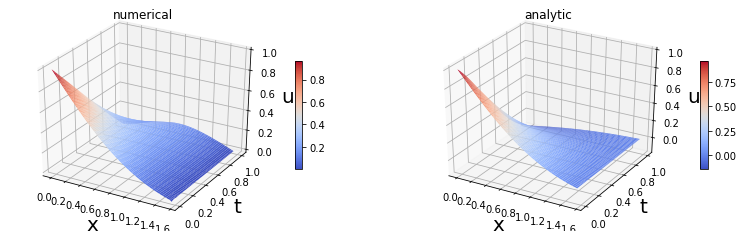

In [ ]:
draw(dict_ans, N, K, T)

In [ ]:
def draw_u_x(dict_, N, K, T, time, save_file="plot_u_x.png"):
    fig = plt.figure()
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])
    

    plt.title('U from x')
    plt.plot(x, z1[time], color='r', label='numerical')
    plt.plot(x, z2[time], color='b', label='analytic')
    plt.legend(loc='best')
    plt.ylabel('U')
    plt.xlabel('x')
    plt.savefig(save_file)
    plt.show()
    
    err = []
    error = compare_error(dict_ans)
    for i in range(len(error)):
        tmp = 0
        for j in error[i]:
            tmp += j
        err.append(tmp/len(error[i])/100)
    plt.title('Error from t')
    plt.plot(t, err, color='b', label='err')
    plt.legend(loc='best')
    plt.ylabel('Err')
    plt.xlabel('t')
    plt.savefig('err.png')
    plt.show()

Time check

In [ ]:
curr_time = int(input())

0


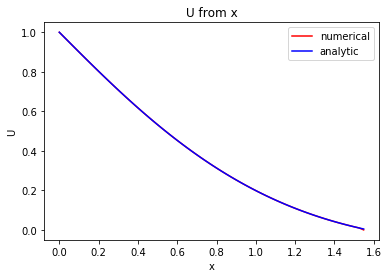

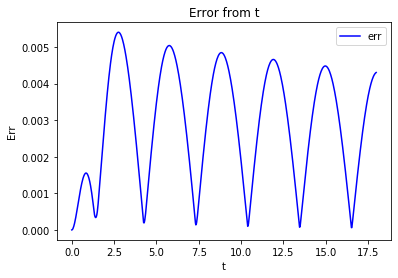

In [ ]:
draw_u_x(dict_ans, N, K, T, curr_time)

In [ ]:
error = compare_error(dict_ans)
avg_err = 0.0
for i in error:
    for j in i:
        avg_err += j
    avg_err /= N

First elements in error array:

In [ ]:
print(error[0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0047702677544667815]


Middle elements in error array:

In [ ]:
print(error[int(K/2)])

[0.745336809573716, 0.7453368098772224, 0.744965964590212, 0.7442243120207521, 0.7431119353725981, 0.7416289652259946, 0.7397755832173447, 0.7375520268762734, 0.7349585955655981, 0.7319956574573695, 0.7286636574666446, 0.7249631260541083, 0.7208946887992222, 0.7164590766373471, 0.7116571366473566, 0.7064898432707246, 0.7009583098389605, 0.6950638002836524, 0.6888077409022644, 0.682191732053207, 0.6752175596555791, 0.6678872063722691, 0.6602028623597992, 0.6521669354742816, 0.6437820608300632, 0.6350511096159356, 0.6259771970830863, 0.6165636896290901, 0.6068142109131027, 0.5967326469488049, 0.586323150133455, 0.575590142183451, 0.5645383159589296, 0.55317263617199, 0.5414983389849467, 0.5295209305164759, 0.5172461842844449, 0.5046801376245063, 0.4918290871330524, 0.4786995831917748, 0.46529842363874635, 0.4516326466575814, 0.4377095229617499, 0.4235365473554956, 0.40912142975599414, 0.3944720857633819, 0.37959662686608037, 0.36450335036847126, 0.34920072912645883, 0.3336974011738541, 0

Last elements in error array:

In [ ]:
print(error[-1])

[0.6687661367583181, 0.6687661367583282, 0.6684394171006912, 0.6677860209774029, 0.6668060353584543, 0.6654995921620298, 0.6638668700020774, 0.6619080965040225, 0.6596235511763746, 0.6570135688230181, 0.6540785434780756, 0.6508189328424174, 0.6472352631981596, 0.643328134774871, 0.6390982275386928, 0.6345463073731942, 0.6296732326185385, 0.624479960933434, 0.6189675564424023, 0.6131371971291166, 0.6069901824349768, 0.600527941020656, 0.5937520386471461, 0.586664186131798, 0.5792662473340373, 0.571560247124822, 0.5635483792935249, 0.555233014345734, 0.5466167071455192, 0.5377022043559714, 0.5284924516323125, 0.5189906005225826, 0.5092000150318415, 0.4991242778069668, 0.4887671959004965, 0.4781328060735299, 0.4672253795994771, 0.45604942653241554, 0.44460969940597334, 0.43291119633099207, 0.42095916346273377, 0.4087590968110579, 0.39631674336980854, 0.38363810154459854, 0.37072942086123967, 0.3575972009402426, 0.3442481897260728, 0.33068938096318534, 0.31692801091425915, 0.30297155431949

In [ ]:
print(f'Average error in each N: {avg_err}')

Average error in each N: 0.43640719038231324


In [ ]:
print(f'Average error\t\t: {avg_err / K}')

Average error		: 0.0005712135999768498
